# The Organizational Ecology of College Affordability: Research Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities

### By Charlie Eaton, Sheisha Kulkarni, Robert Birgeneau, Henry Brady, and Michael Hout

## Replication of Analyses and Figures, published 2019

In [1]:
*copy  affording_2000_2015_20220115
*save affording_2000_2015_20220115, replace
*outsheet using affording_2000_2015_20220115.csv, comma replace






(j = 1 3 5 7 9)

Data                               Long   ->   Wide
-----------------------------------------------------------------------------
Number of observations               80   ->   16          
Number of variables                   4   ->   11          
j variable (5 values)            hgroup   ->   (dropped)
xij variables:
                                fgrnt_p   ->   fgrnt_p1 fgrnt_p3 ... fgrnt_p9
                              all_under   ->   all_under1 all_under3 ... all_und
> er9
-----------------------------------------------------------------------------


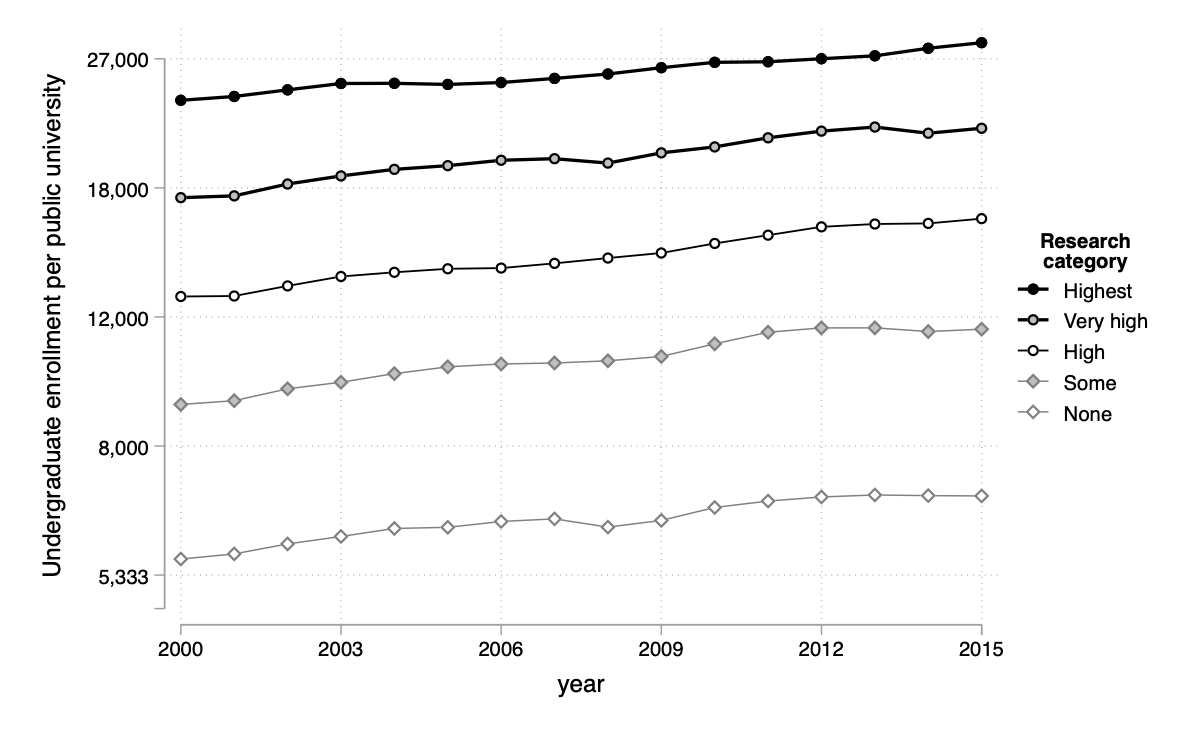















file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F1_undergradu
    > ates.pdf saved as PDF format


In [2]:
**REPLICATION OF ANALYSES FOR "THE ORGANIZATIONAL ECOLOGY OF COLLEGE AFFORDABILITY"

set more off

use affording_2000_2015_20220115, clear

set scheme plotplainblind

collapse (mean) fgrnt_p all_under, by(hgroup year)
reshape wide fgrnt_p all_under, i(year) j(hgroup)

lab def Thousands 125000 "125" 250000 "250" 500000 "500" 1000000 "1,000"   ///
	2000000 "2,000" 4000000 "4,000"
lab val all_under1 Thousands
lab val all_under3 Thousands
lab val all_under5 Thousands
lab val all_under7 Thousands
lab val all_under9 Thousands

lab var all_under1 "Highest"
lab var all_under3 "Very high"
lab var all_under5 "High"
lab var all_under7 "Some"
lab var all_under9 "None"

**FIGURE 1 Undergrad enrollments

tw (connect all_under1 all_under3 all_under5 all_under7 all_under9 year, sort msym(O O O D D) ///
	mc(black black black gs8 gs8) mfc(black gs12 white gs12 white) ///
	lp(l l l l l) lc(black black black gs8 gs8) ///
	lw(medthick medthick medthin thin thin)) if year>=2000, ///
	legend(size(small) pos(3) ///
	subtitle("{bf:Research}""{bf:category}", size(small))) ///
	xlab(2000(3)2015) xtick(2015) ///
	ylab(5333 8000 12000 18000 27000, format(%9.0fc)) ytick(4800) ///
	yscale(log range(4800 27000))  name(enrollment, replace) ///
	ytitle(Undergraduate enrollment per public university) xsize(6.5)
	
graph export _F1_undergraduates.pdf, replace

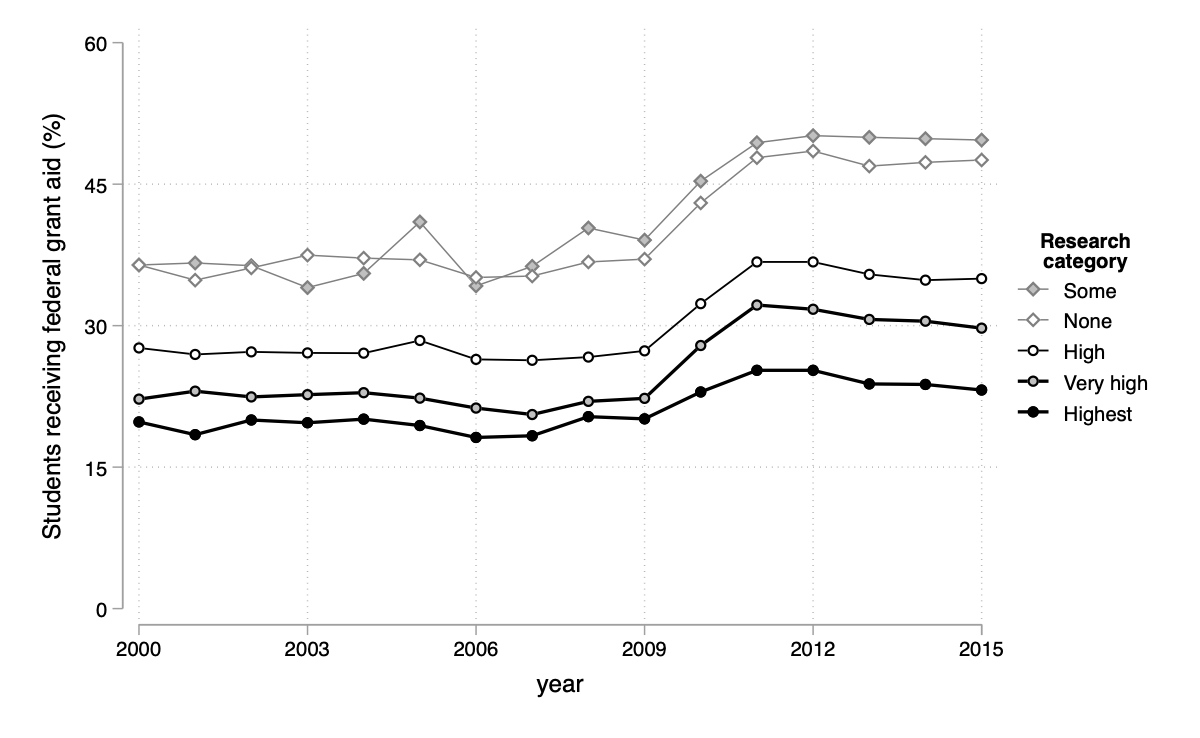









file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F2_federal_gr
    > ant_recipients.pdf saved as PDF format


In [3]:
***  Figure 2: federal grant recipients by type of university

lab var fgrnt_p1 "Highest"
lab var fgrnt_p3 "Very high"
lab var fgrnt_p5 "High"
lab var fgrnt_p7 "Some"
lab var fgrnt_p9 "None"

tw (connect fgrnt_p1 fgrnt_p3 fgrnt_p5 fgrnt_p7 fgrnt_p9 year, sort msym(O O O D D) ///
	mc(black black black gs8 gs8) mfc(black gs12 white gs12 white) ///
	lp(l l l l l) lc(black black black gs8 gs8) ///
	lw(medthick medthick medthin thin thin)) if year>=2000, ///
	legend(size(small) pos(3) order(4 5 3 2 1) ///
	subtitle("{bf:Research}""{bf:category}", size(small))) ///
	xlab(2000(3)2015) xtick(2015) ylab(0(15)60) name(pell_enrollment, replace) ///
	ytitle(Students receiving federal grant aid (%)) xsize(6.5)

graph export _F2_federal_grant_recipients.pdf, replace






(note:  named style none not found in class margin, default attributes used)


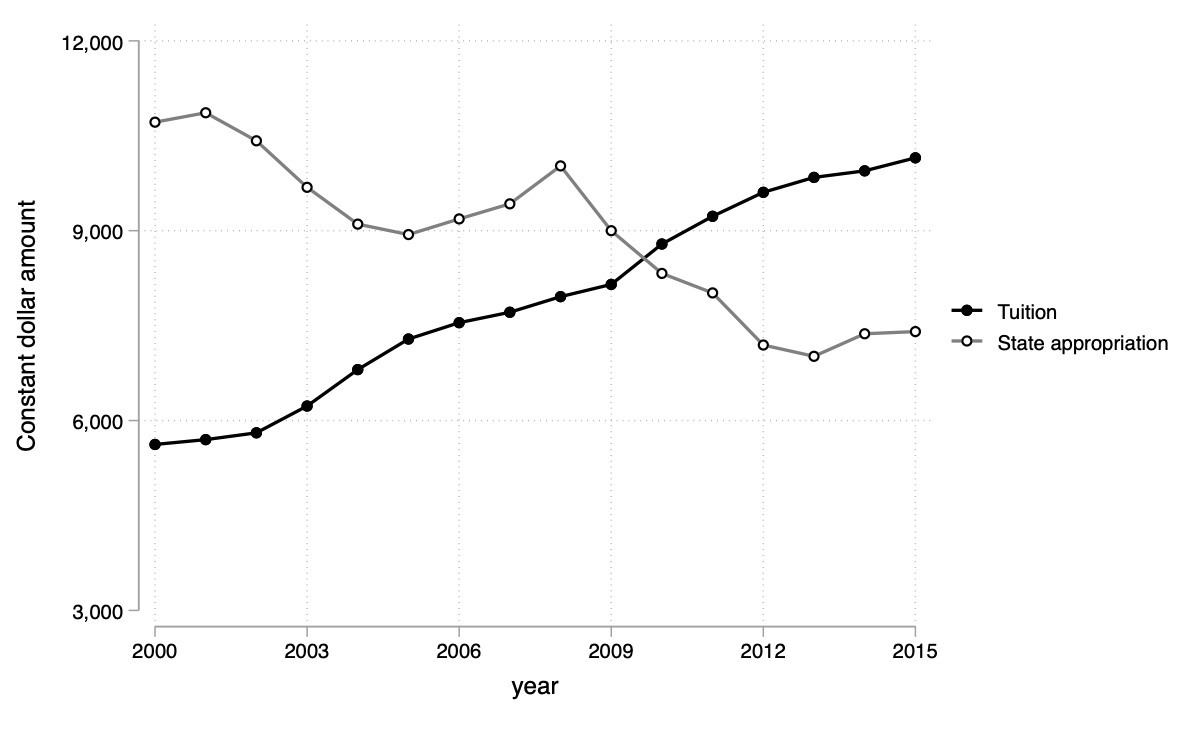



file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F3_tuition_st
    > ate_approp.pdf saved as PDF format


In [4]:
***   Figure 3: Tuition & state appropriations

use affording_2000_2015_20220115, clear

collapse (mean) nettuition01_fte state_local_app_fte [aweight=fte_count], by(year)

label var nettuition01_fte "Tuition"

label var state_local_app_fte "State appropriation"

tw (connect nettuition01_fte state_local_app_fte year, sort msym(O O) ///
	mc(black black) mfc(black white) lp(l l) lc(black gs8) ///
	lw(medthick medthick)) if year>=2000, legend(size(small) pos(3)) ///
	xlab(2000(3)2015) ylab(3000(3000)12000, format(%7.0fc)) ///
	ytitle(Constant dollar amount) xsize(6.5) aspect(.75) ///
	name(revenue, replace) graphregion(margin(none))

graph export _F3_tuition_state_approp.pdf, replace



lo_inc_rpy_3yr_rt_supp already numeric; no replace
lo_inc_debt_mdn already numeric; no replace




(0 observations deleted)


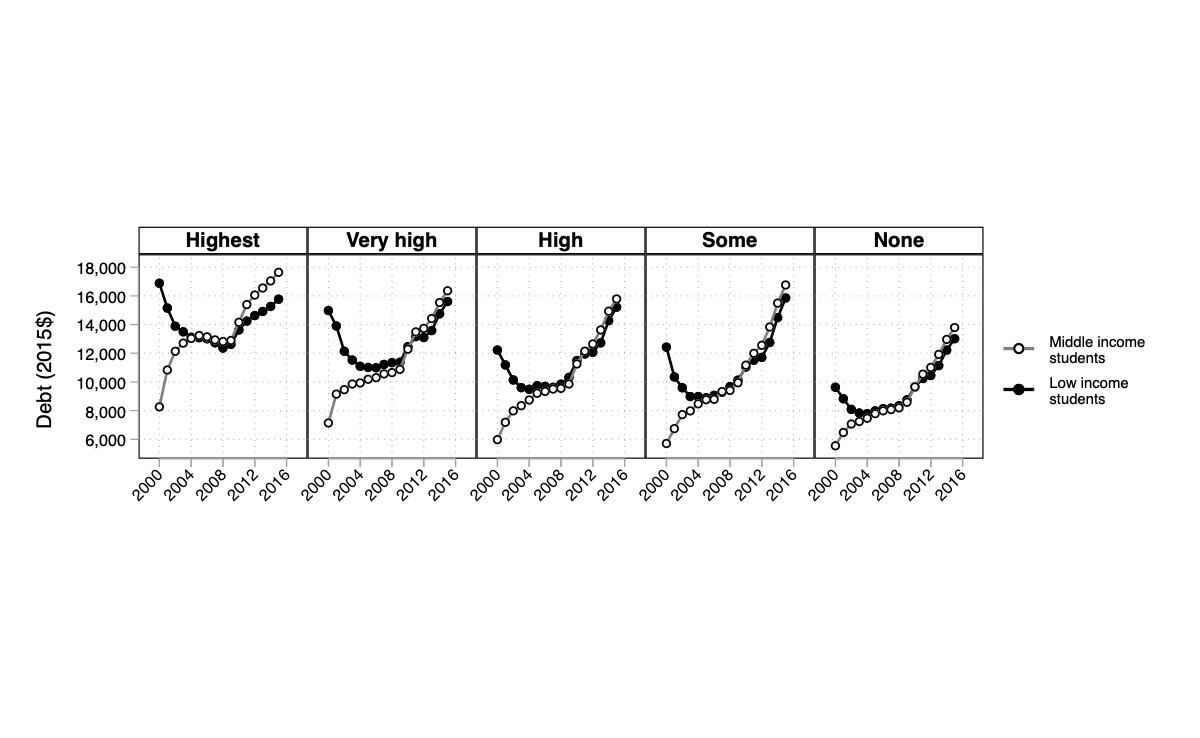







file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F4_debt_at_ex
    > it_2000_2015.pdf saved as PDF format


In [5]:
**FIGURE 4 DEBT AT EXIT**

use affording_2000_2015_20220115, clear

destring lo_inc_rpy_3yr_rt_supp lo_inc_debt_mdn, replace
sort opeid year
collapse (min) hgroup (first) control spend_ugdtuit_low spend_ugd_4yr_low instnm  stabbr ///
md_inc_rpy_3yr_rt_supp lo_inc_debt_mdn md_inc_debt_mdn lo_inc_rpy_3yr_rt_supp (sum) all_under ///
upgrntn igrnt_t fgrnt_t sgrnt_t fgrnt_n (mean) acceptrate enrolrate act25th act75th sat25thread sat25thmath sat25th sat75thread sat75thmath sat75th instatetuition low, by(opeid year)

collapse (mean) lo_inc_debt_mdn md_inc_debt_mdn lo_inc_rpy_3yr_rt_supp md_inc_rpy_3yr_rt_supp [aweight=fgrnt_n], by(hgroup year)
drop if year==1997

lab var hgroup "Research category"
lab def hgroup 1 "{bf:Highest}" 3 "{bf:Very high}" 5 "{bf:High}" 7 "{bf:Some}" 9 "{bf:None}"
lab val hgroup hgroup

tw (connect lo_inc_debt_mdn md_inc_debt_mdn year, sort msym(O O) ///
	mc(black black) mfc(black white) lp(l l) lc(black gs8) ///
	lw(medthick medthick)) if year>1999 & year<2016, ///
	by(hgroup, compact row(1) legend(pos(3)) note("")) ///
	legend(size(vsmall) order(2 1) ///
	label(1 "Low income""students") label(2 "Middle income""students")) ///
	xlab(2000(4)2016, angle(45)) xtick(2000(4)2016) xscale(range(1999 2017)) ///
	xtitle("", size(small)) ylab(6000(2000)18000, format(%7.0fc) labsize(small)) ///
	ytitle("Debt (2015$)", size(small)) xsize(6.5) aspect(1.25) name(debtatexit, replace)

graph export _F4_debt_at_exit_2000_2015.pdf, replace


(35 real changes made)

(35 real changes made)


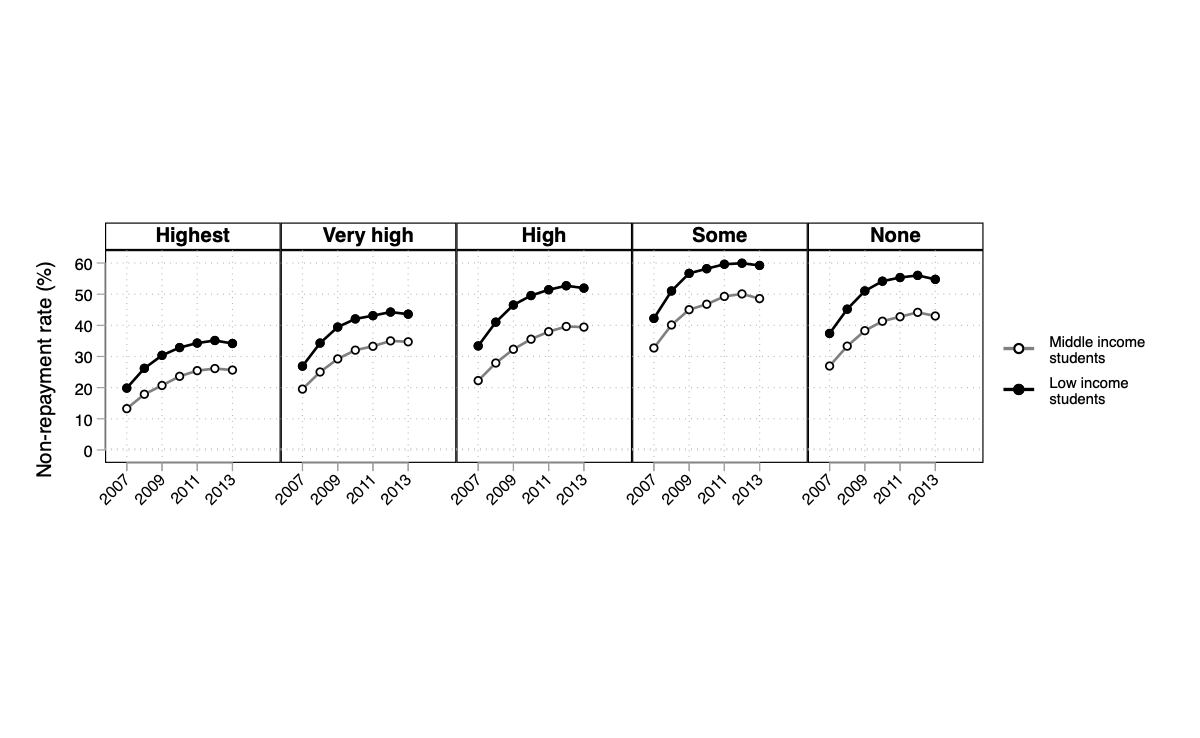




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F5_nonrepayme
    > nt_3yr_2006_2013.pdf saved as PDF format


In [6]:
****FIGURE 5 LOAN REPAYMENT RATES

replace lo_inc_rpy_3yr_rt_supp = (1-lo_inc_rpy_3yr_rt_supp)*100 if lo_inc_rpy_3yr_rt_supp!=.
replace md_inc_rpy_3yr_rt_supp = (1-md_inc_rpy_3yr_rt_supp)*100 if md_inc_rpy_3yr_rt_supp!=.

tw (connect lo_inc_rpy_3yr_rt_supp md_inc_rpy_3yr_rt_supp year, sort msym(O O) ///
	mc(black black) mfc(black white) lp(l l) lc(black gs8) ///
	lw(medthick medthick)) if year>2006, ylab(0(10)60) ///
	by(hgroup, compact row(1) legend(pos(3)) note("")) ///
	legend(size(vsmall) order(2 1) ///
	label(1 "Low income""students") label(2 "Middle income""students")) ///
	xlab(2007(2)2013, angle (45)) xtick(2007(2)2013) xscale(range(2006.5 2013.5)) ///
	xtitle("", size(small)) ytitle("Non-repayment rate (%)", size(small)) ///
	yline(0, lp(dot) lc(gs12)) yline(.4, lp(dot) lc(gs12)) xsize(6.5) aspect(1.25)

graph export _F5_nonrepayment_3yr_2006_2013.pdf, replace



(32,388 observations deleted)

(1,870 real changes made)



(7 missing values generated)

(7 real changes made)

(1 missing value generated)

(1 missing value generated)


    Variable |      Mean
-------------+----------
spend_ugd_~w |  1983.452
------------------------

(1 missing value generated)

(2 observations deleted)

(note:  named style none not found in class margin, default attributes used)


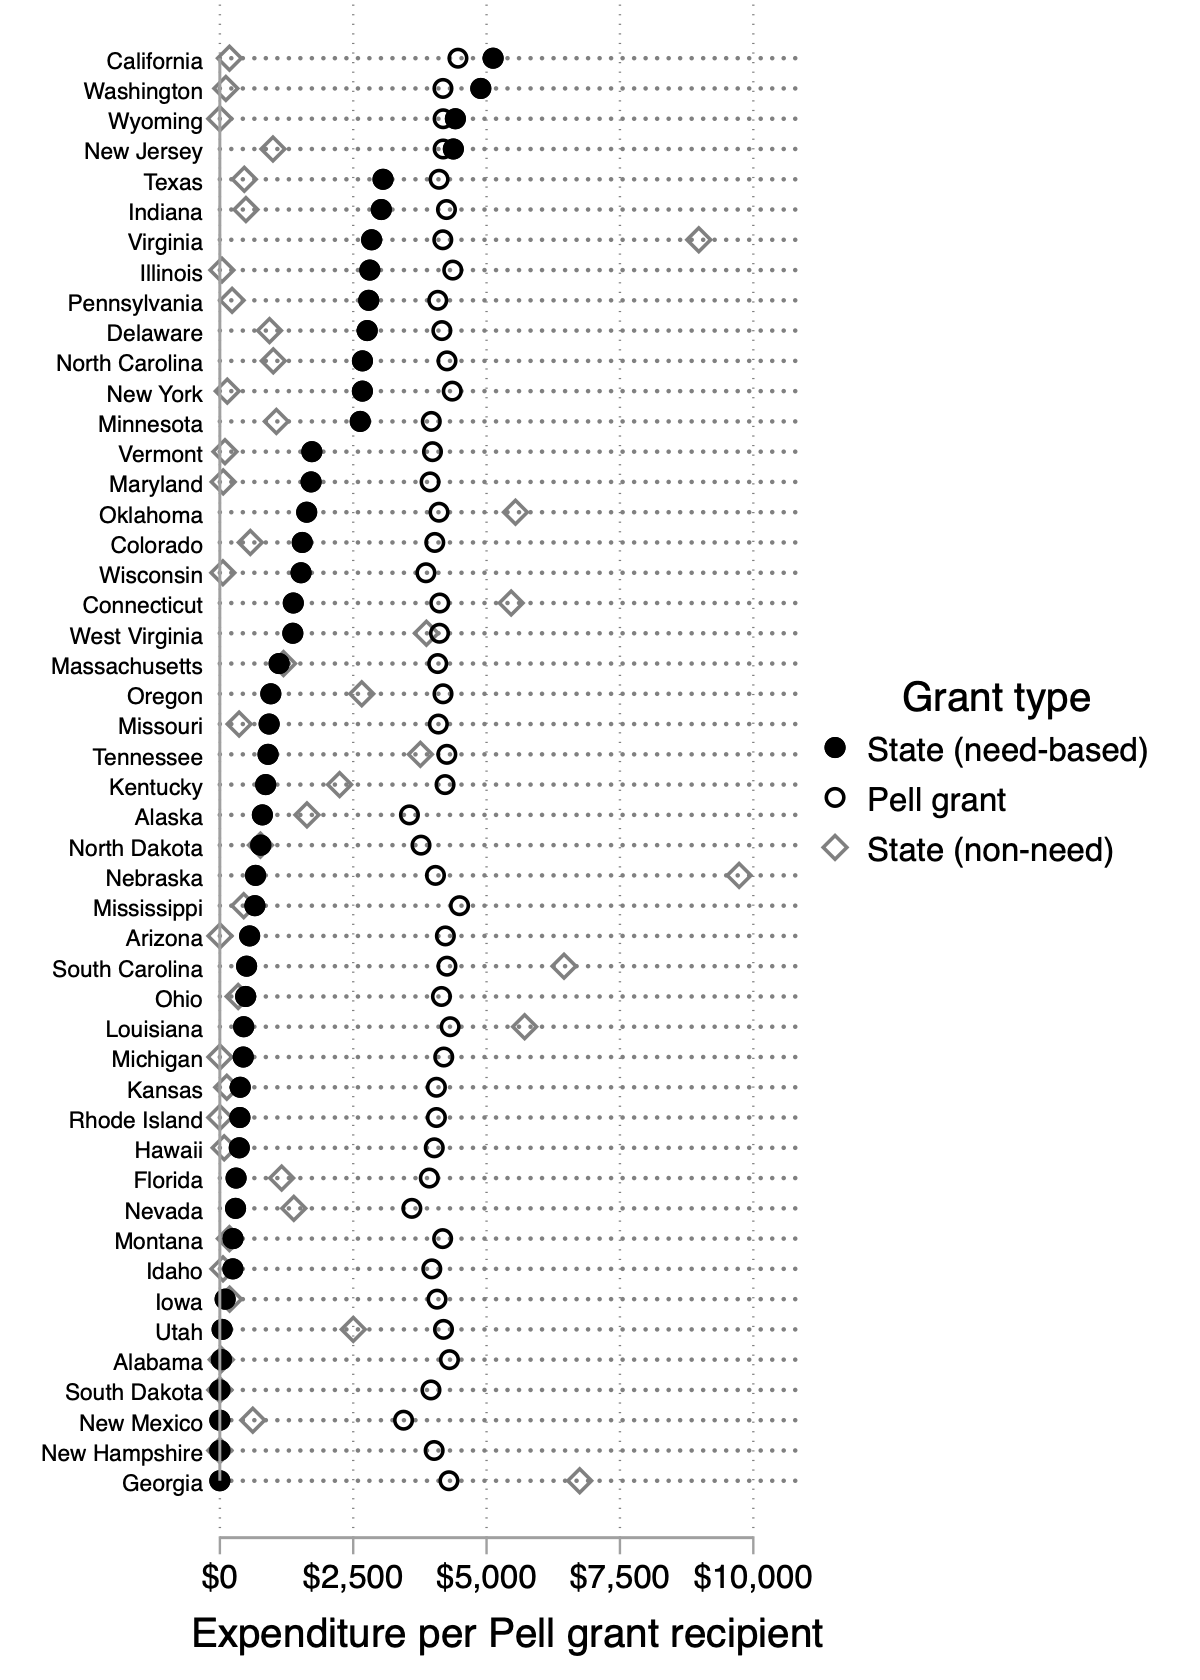



file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F6_grant_per_
    > pell_by_state20190530.pdf saved as PDF format


In [7]:
**CREATE FIGURE 6**

use affording_2000_2015_20220115, clear
keep if year==2015
replace hgroup=7 if hgroup==9

collapse (first) stabbr instnm sgrnt_t pell_exp total030 total3048 total048 upgrntn all_under ///
state public_4yr_recipients public_4yr_amt instate low per_lowinc nonneed, by(unitid year)

collapse (sum) sgrnt_t pell_exp total030 total3048 total048 upgrntn all_under (first) state nonneed public_4yr_recipients public_4yr_amt (mean) instate low per_lowinc , by(stabbr)

gen spend_recipient= public_4yr_amt / public_4yr_recipients
replace spend_recipient=0 if spend_recipient==.

gen spend_ugd_pell=pell_exp/upgrntn

gen spend_ugd_4yr_low=public_4yr_amt/upgrntn

tabstat spend_ugd_4yr_low [aweight=upgrntn], s(mean)

gen nonneed_4yr_low=nonneed/upgrntn
***GENERATE FIGURE 6**
drop if stabbr=="ME" | stabbr=="AR"

graph dot (asis) spend_ugd_4yr_low spend_ugd_pell nonneed_4yr_low , ndots(50) dots(mc(gs8)) ///
	over(state, gap(1) sort(spend_ugd_4yr_low) descending label(labsize(vsmall))) ///
	marker(1, msym(O) mc(black)) ///
	marker(2, msym(Oh)  mc(black)) ///
	legend(size(small) pos(3) title("Grant type") ///
	label(1 "State (need-based)") ///
	label(2 "Pell grant") ///
	label(3 "State (non-need)")) ///
	ytitle("Expenditure per Pell grant recipient") ///
	ylab(1 "$0" 2500 "$2,500" 5000 "$5,000" 7500 "$7,500" 10000 "$10,000", ///
	labsize(small) grid glp(dot) glc(gs8))  ///
	xsize(5) ysize(7) ///
	scheme(plotplain) graphregion(margin(none))

graph export _F6_grant_per_pell_by_state20190530.pdf, replace


(note:  named style none not found in class margin, default attributes used)


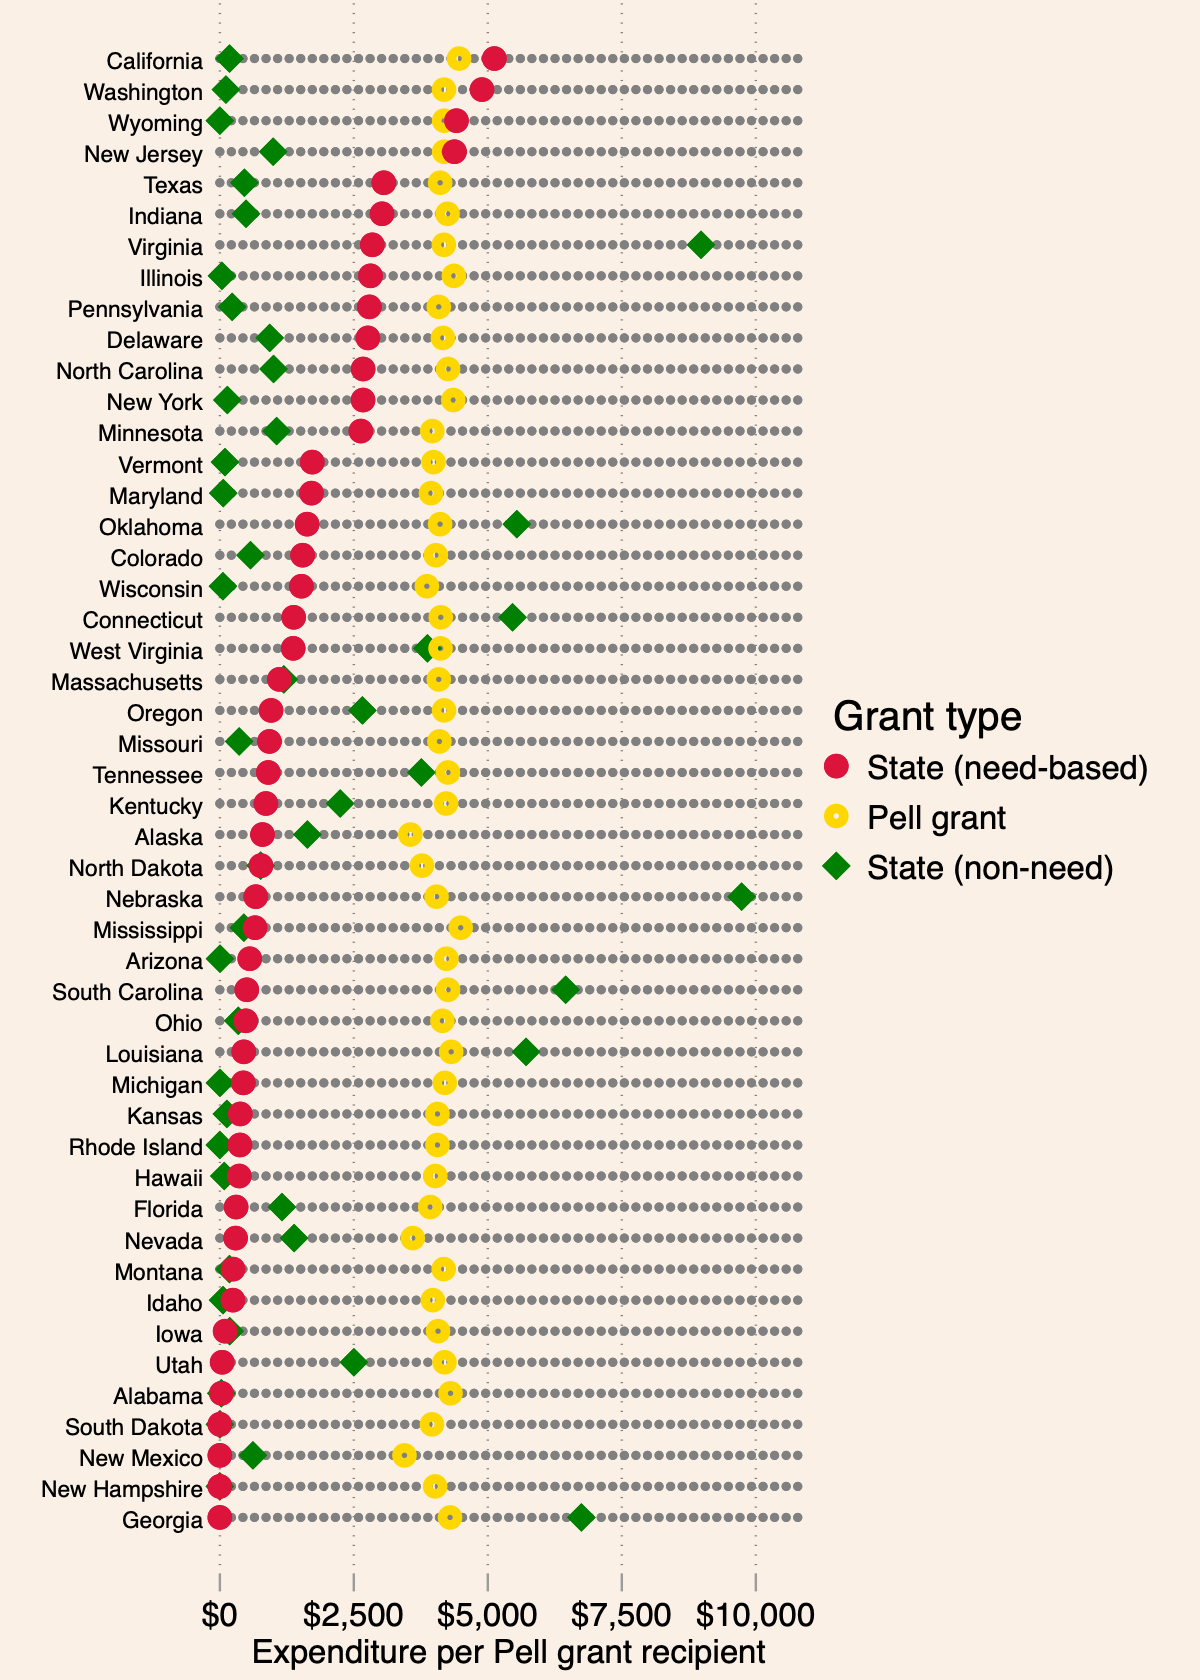



file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F6_grant_per_
    > pell_by_state_dubois.pdf saved as PDF format

file state_aid_per_recipient.xlsx saved


In [8]:
**DuBois Version

graph dot (asis) spend_ugd_4yr_low spend_ugd_pell nonneed_4yr_low , ndots(50) dots(mc(gs8)) ///
	over(state, gap(1) sort(spend_ugd_4yr_low) descending label(labsize(vsmall))) ///
	marker(1, msym(O) ) ///
	marker(2, msym(Oh) ) ///
	marker(3, msym(d) ) ///
	legend(size(small) pos(3) title("Grant type") ///
	label(1 "State (need-based)") ///
	label(2 "Pell grant") ///
	label(3 "State (non-need)")) ///
	ytitle("Expenditure per Pell grant recipient") ///
	ylab(1 "$0" 2500 "$2,500" 5000 "$5,000" 7500 "$7,500" 10000 "$10,000", ///
	labsize(small) grid glp(dot) glc(gs8))  ///
	xsize(5) ysize(7) ///
	scheme(dubois) graphregion(margin(none))
	
graph export _F6_grant_per_pell_by_state_dubois.pdf, replace

**EXPORT Figure 6 DATA**
	
export excel state spend_ugd_pell spend_ugd_4yr_low using state_aid_per_recipient.xlsx, firstrow(varlabels) replace
	



(32,388 observations deleted)

(19 observations deleted)


(1 missing value generated)

(1 missing value generated)

(5 missing values generated)

(5 real changes made)

(1 missing value generated)

(1 missing value generated)

(1 missing value generated)


(1 missing value generated)


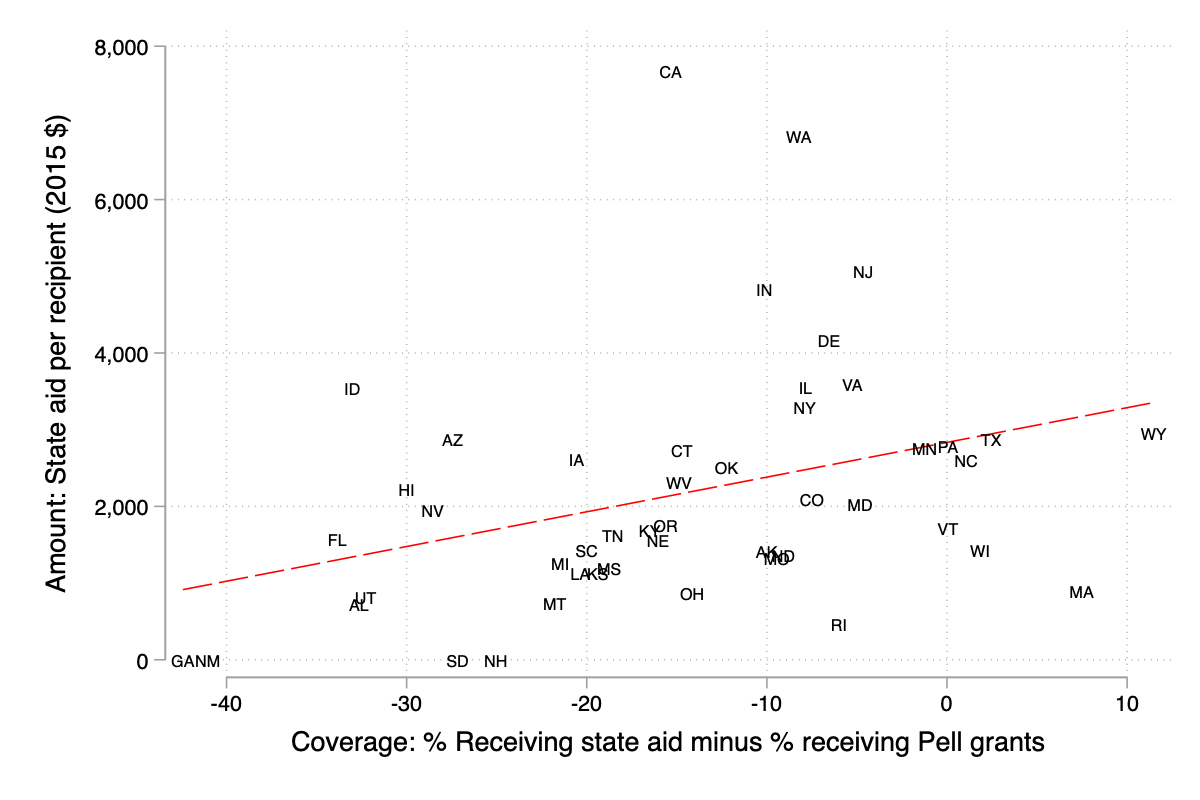




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F7_aid_recipi
    > ent_aid_coverage.pdf saved as PDF format


In [9]:
**CREATE FIGURE 7**

use affording_2000_2015_20220115, clear
keep if year==2015
drop if stabbr=="ME" | stabbr=="AR"
**COLLAPSE DATA TO STATE LEVEL (NOT BY RESEARCH CATEGORY) WITH WEIGHTED MEANS**
collapse (sum) pell_exp total030 total3048 total048 upgrntn all_under (first) state public_4yr_recipients public_4yr_amt (mean) instate low per_lowinc , by(stabbr)

gen pct_pell= upgrntn / all_under
gen pct_stateaid= public_4yr_recipients / all_under

gen spend_recipient= public_4yr_amt / public_4yr_recipients
replace spend_recipient=0 if spend_recipient==.

/* This is Charlie's spend pell amount */
gen spend_ugd_pell=pell_exp/upgrntn
/* this is Charlie's spend_stategrnt_amt */
gen spend_ugd_4yr_low=public_4yr_amt/upgrntn

gen spend_ugdtuit_low=100*(spend_ugd_4yr_low/instate)

label variable per_lowinc "% of Pell Recipients"

**CALCULATE PERCENT RECEIVING STATE AID MINUS PERCENT RECEIVING PELL**
gen pct_state_min_pell = (pct_stateaid - pct_pell)*100
	
	tw (lfit spend_recipient pct_state_min_pell  , ///
	sort lp(_) lc(red) lw(thin))  ///
	(scatter spend_recipient pct_state_min_pell, ///
	msym(i) mlabels(stabbr) mlabsize(vsmall) mlabpos(0))  , ///
	legend(off)  ///
	ytitle("Amount: State aid per recipient (2015 $)") ///
	xtitle("Coverage: % Receiving state aid minus % receiving Pell grants") ///
	ylabel(0(2000)8000, format(%10.0fc)) 
				
	gr export _F7_aid_recipient_aid_coverage.pdf, replace



(32,388 observations deleted)

(19 observations deleted)

(1,854 real changes made)


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
igrnt_low_~c |        581     6965.15    8034.527          0    60578.5

6965.1499


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
sgrnt_low_~c |        581    3590.033    3788.357          0   40112.09

3590.0333


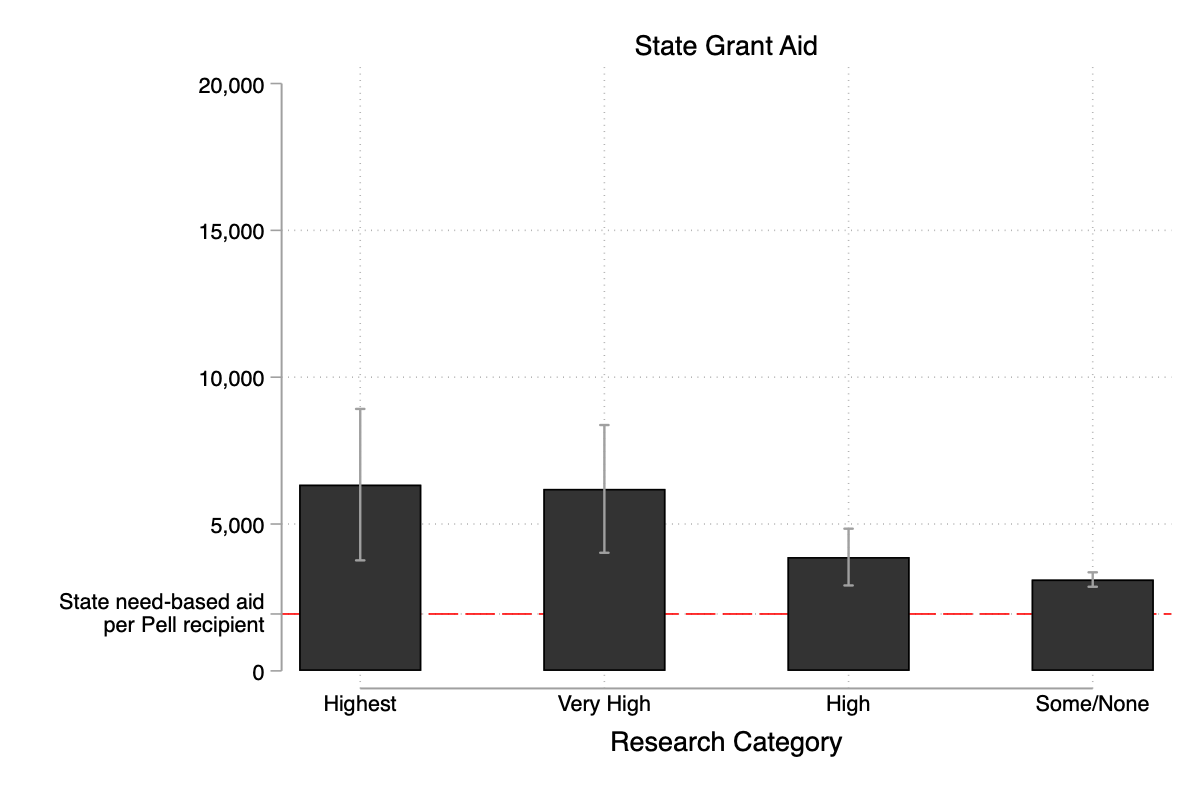

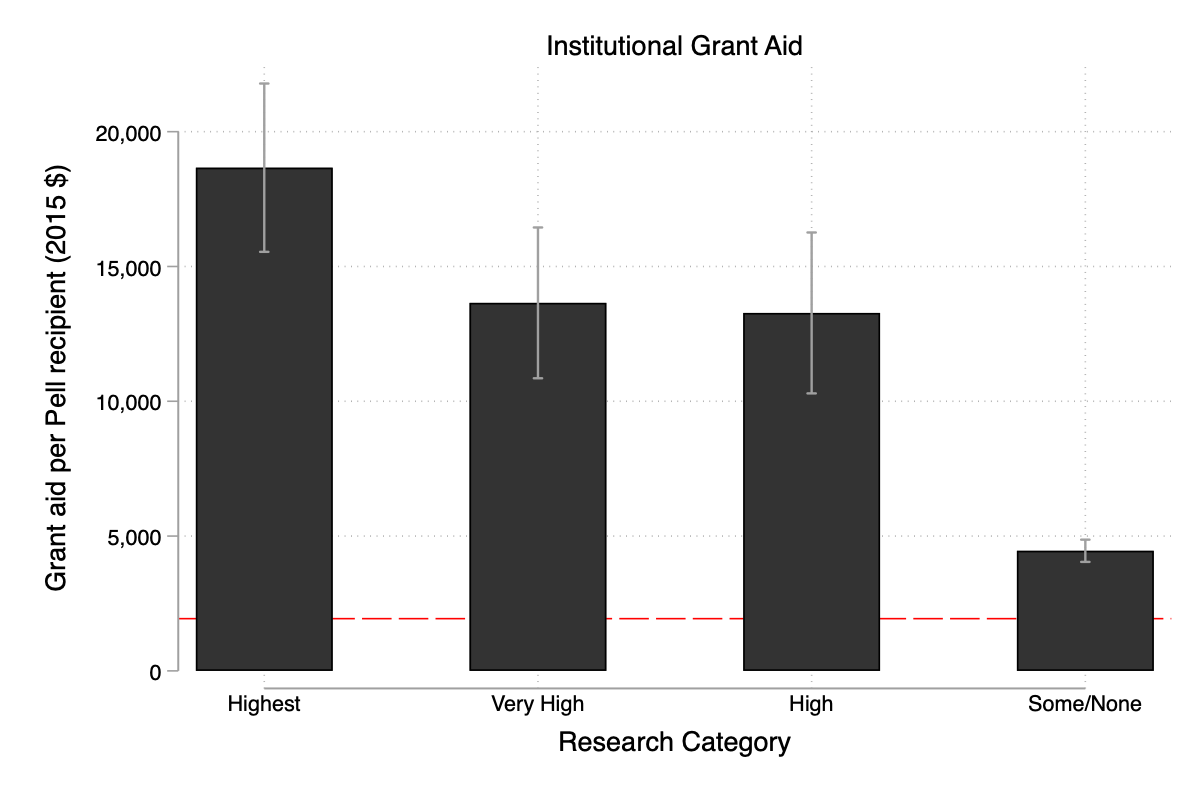












    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
mn_igrnt_low |          4    12511.61      5906.4   4454.736   18664.78


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
mn_sgrnt_low |          4    4880.248    1634.055   3109.573    6340.64

(note:  named style none not found in class margin, default attributes used)
(note:  named style none not found in class margin, default attributes used)


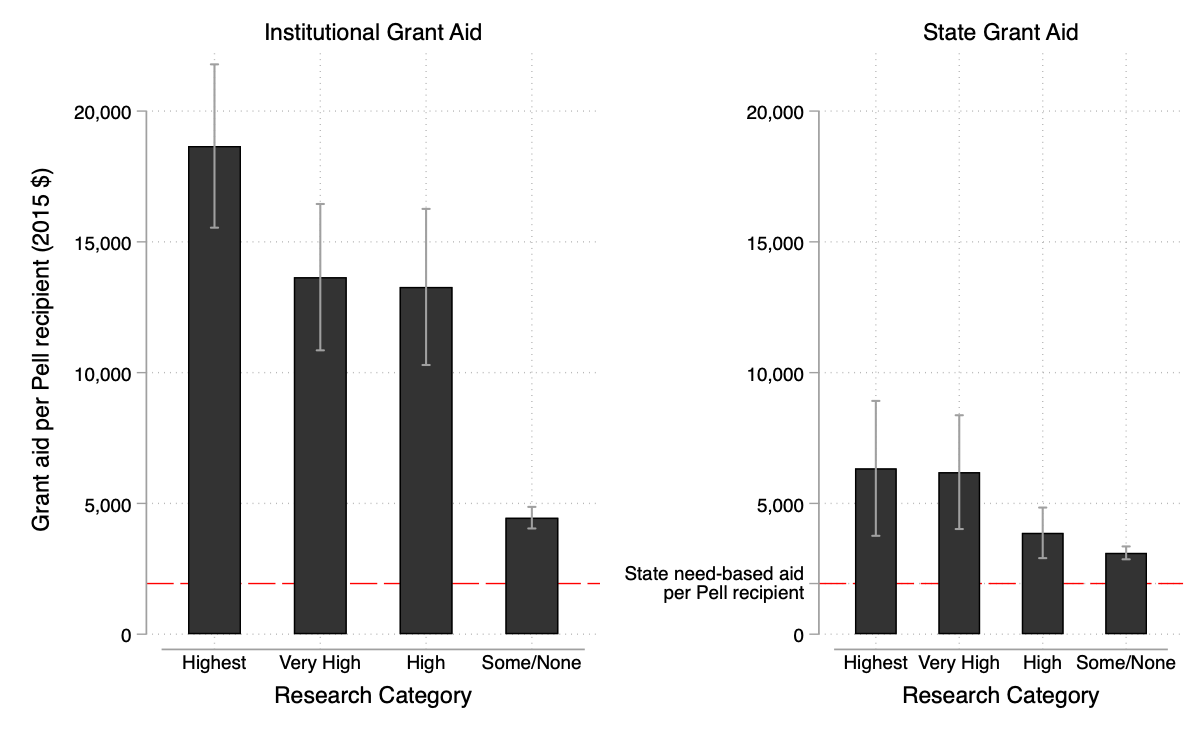



file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F8_grant_aid_
    > bar_20190517.pdf saved as PDF format


In [10]:
******** FIGURE 8 AID BY RESEARCH CATEGORY**

use affording_2000_2015_20220115, clear
keep if year==2015
drop if stabbr=="ME" | stabbr=="AR"
replace hgroup=7 if hgroup==9

sum igrnt_low
display r(mean)

sum sgrnt_low
display r(mean)

collapse (mean) mn_spend_ugd_4yr_low=spend_ugd_4yr_low mn_sgrnt_low= sgrnt_low mn_igrnt_low= igrnt_low ///
(sd) sd_spend_ugd_4yr_low=spend_ugd_4yr_low  sd_sgrnt_low=sgrnt_low sd_igrnt_low= igrnt_low (count) n=upgrntn, by(hgroup)

generate hiigrnt_low = mn_igrnt_low + invttail(n-1,0.025)*(sd_igrnt_low / sqrt(n))
generate loigrnt_low = mn_igrnt_low - invttail(n-1,0.025)*(sd_igrnt_low / sqrt(n))

generate hisgrnt_low = mn_sgrnt_low + invttail(n-1,0.025)*(sd_sgrnt_low / sqrt(n))
generate losgrnt_low = mn_sgrnt_low - invttail(n-1,0.025)*(sd_sgrnt_low / sqrt(n))

graph twoway (bar mn_sgrnt_low hgroup) ///
(rcap hisgrnt_low losgrnt_low hgroup),  ///
xlabel( 1 "Highest" 3 "Very High" 5 "High" 7 "Some/None", noticks) ytitle("") ///
ylabel(0 "0"  1936.825 `" "State need-based aid" "per Pell recipient" "' 5000 "5,000" 10000 "10,000" 15000 "15,000" 20000 "20,000") ///
xtitle("Research Category") legend(off) name(sgrntbar, replace) title("State Grant Aid") ///
yline( 1936.825, lp(_) lcolor(red) lstyle(foreground)) 

graph twoway (bar mn_igrnt_low hgroup) ///
(rcap hiigrnt_low loigrnt_low hgroup), ///
xlabel( 1 "Highest" 3 "Very High" 5 "High" 7 "Some/None", noticks) ///
ytitle("Grant aid per Pell recipient (2015 $)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Research Category") legend(off) name(igrntbar, replace) ///
title("Institutional Grant Aid") ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground))

*ymlabel(1298.493 `" "State need-based aid" "per Pell recipient" "') ///

sum mn_igrnt_low
sum mn_sgrnt_low

graph combine igrntbar sgrntbar, rows(1) ycommon xcommon imargin(none) scale(1.25) xsize(6.5) ysize(4)

graph export _F8_grant_aid_bar_20190517.pdf, replace
	



(32,388 observations deleted)




     +-------------------+
     | stabbr        low |
     |-------------------|
  1. |     CA   6655.032 |
  2. |     NY   7348.159 |
  3. |     AK   7497.686 |
  4. |     NC   7508.199 |
  5. |     HI   7560.911 |
     |-------------------|
  6. |     WV   7587.915 |
  7. |     IN   7656.629 |
  8. |     LA   8074.138 |
  9. |     WY       8309 |
 10. |     TX   8345.759 |
     |-------------------|
 11. |     WA    8466.89 |
 12. |     FL    8633.16 |
 13. |     OK   8683.452 |
 14. |     NM   8703.444 |
 15. |     ND   8765.731 |
     |-------------------|
 16. |     IA    8937.32 |
 17. |     NV   8956.262 |
 18. |     RI   9345.545 |
 19. |     TN    9392.91 |
 20. |     MI   9536.765 |
     |-------------------|
 21. |     WI   9602.187 |
 22. |     MN   9638.428 |
 23. |     AR   9648.999 |
 24. |     KY   9896.096 |
 25. |     MO   9918.036 |
     |-------------------|
 26. |     UT   9929.654 |
 27. |     AZ   10073.54 |
 28. |     CT   103

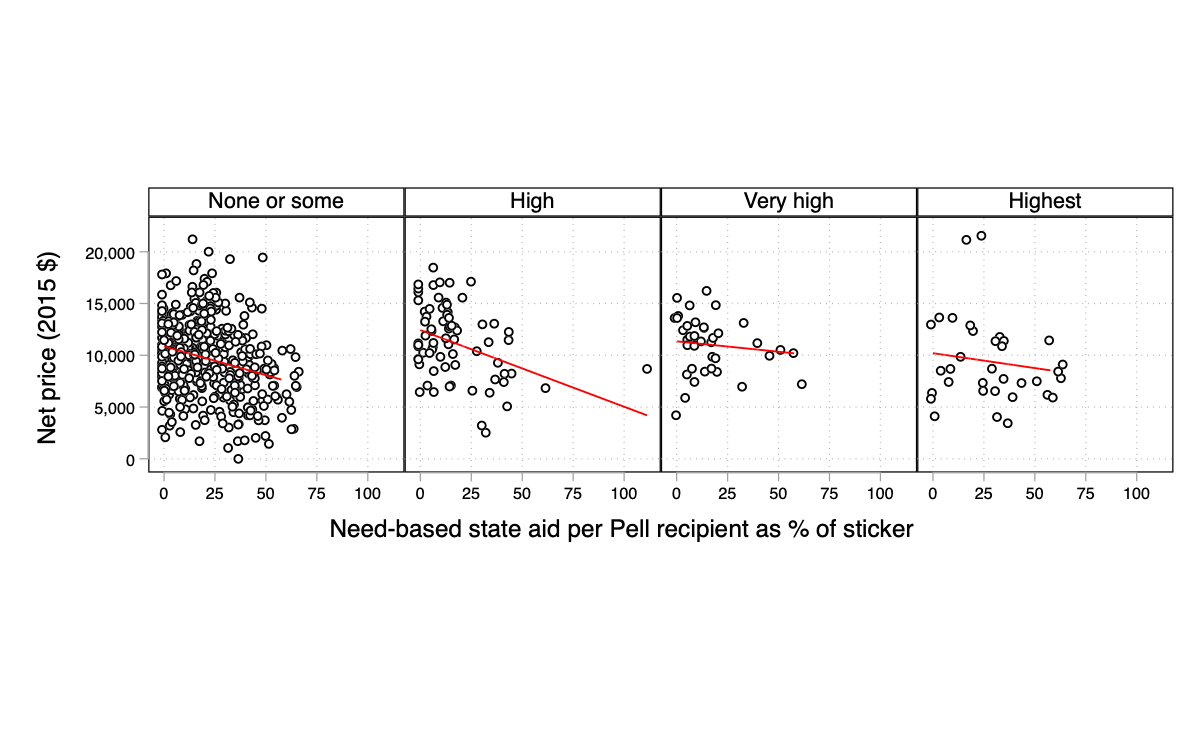




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F9A_Net_Price
    > _By_nassgap_aid_By_Research_Category.pdf saved as PDF format


Linear regression                               Number of obs     =        599
                                                F(4, 49)          =       3.64
                                                Prob > F          =     0.0112
                                                R-squared         =     0.0736
                                                Root MSE          =     3326.7

                                (Std. err. adjusted for 50 clusters in stabbr)
------------------------------------------------------------------------------
             |               Robust
         low | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      HGroup |
       High  |   1565.193   538.0717     2.91   0.005     483.8972    2646.488
  

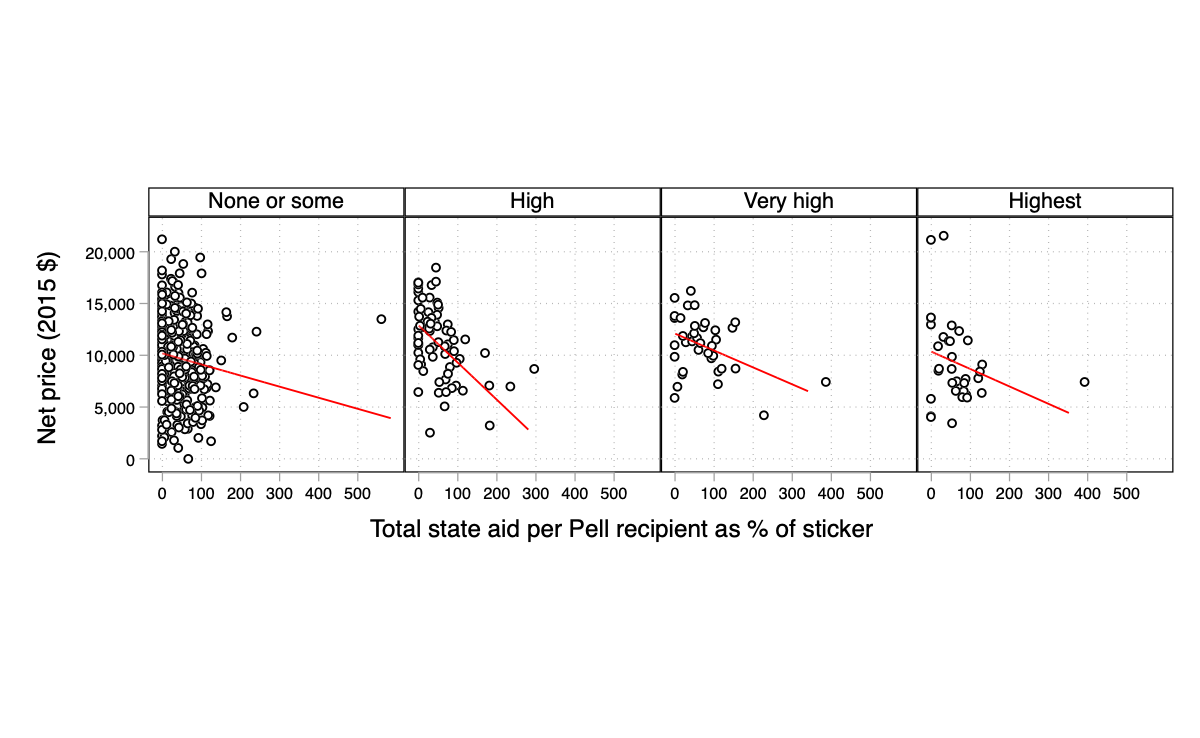




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F9B_Net_Price
    > _By_IPEDS_sgrnt_aid_By_Research_Category.pdf saved as PDF format


Linear regression                               Number of obs     =        599
                                                F(4, 49)          =       2.56
                                                Prob > F          =     0.0499
                                                R-squared         =     0.0284
                                                Root MSE          =     3406.9

                                (Std. err. adjusted for 50 clusters in stabbr)
------------------------------------------------------------------------------
             |               Robust
         low | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      HGroup |
       High  |    1580.24   546.6286     2.89   0.006     481.7484    2678.73

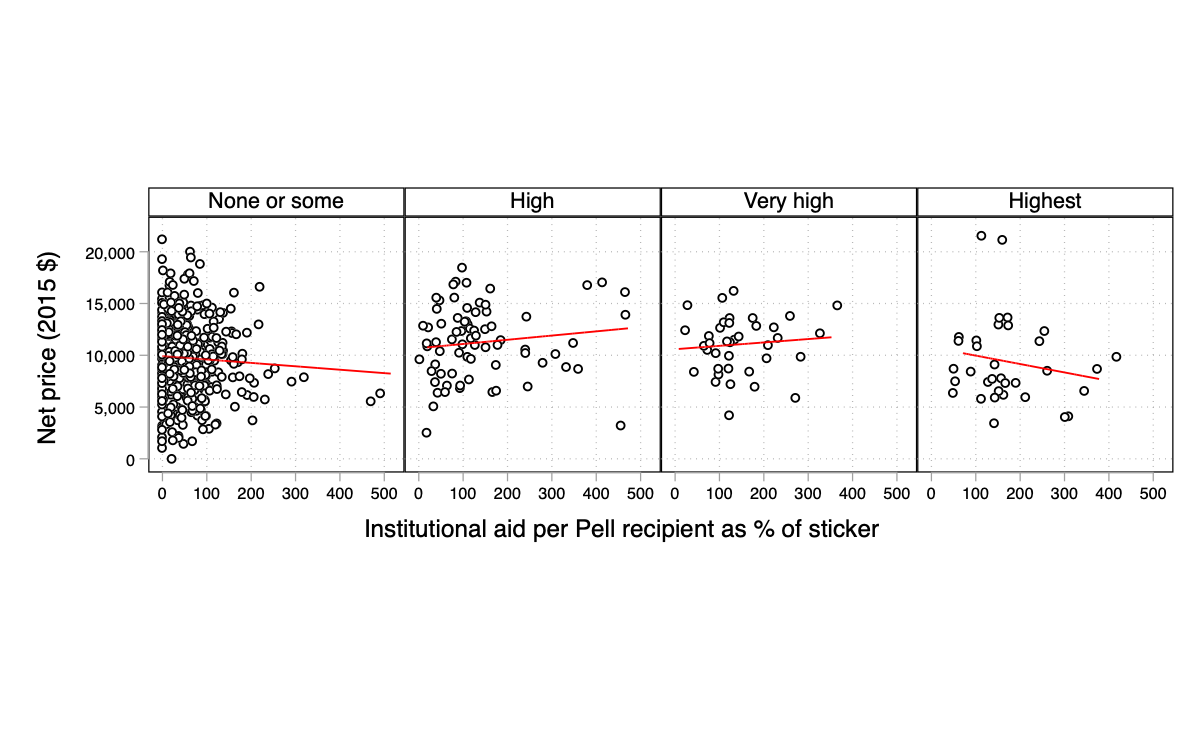




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F9C_Net_Price
    > _By_IPEDS_inst_aid_By_Research_Category.pdf saved as PDF format


In [11]:
**CREATE FIGURE 9**
use affording_2000_2015_20220115, clear
keep if year==2015
collapse (mean) low [aweight=total030], by(stabbr)
sort low
list

use affording_2000_2015_20220115, clear
keep if year==2015
replace hgroup=7 if hgroup==9

collapse (first) hgroup igrnt_low_inc sgrnt_low_inc st_instate_wt_mn stabbr instnm sgrnt_t pell_exp total030 total3048 total048 upgrntn all_under ///
state public_4yr_recipients public_4yr_amt instate low per_lowinc nonneed, by(unitid year)

bysort stabbr: egen state_total_pell=total(upgrntn)


gen spend_ugd_4yr_low=public_4yr_amt/state_total_pell
gen spend_ugdtuit_low=100*(spend_ugd_4yr_low/st_instate_wt_mn)
gen sgrnt_tuit=100 * (sgrnt_low_inc / instate)
gen igrnt_tuit=100 * (igrnt_low_inc / instate)

replace hgroup=7 if hgroup>7             //MH 29 Nov
gen HGroup=.
replace HGroup=1 if hgroup==7
replace HGroup=2 if hgroup==5       //MH 29 Nov
replace HGroup=3 if hgroup==3       //MH 29 Nov
replace HGroup=4 if hgroup==1       //MH 29 Nov

lab def HGroup 1 "None or some" 2 "High" 3 "Very high" 4 "Highest"     //MH 29 Nov
lab val HGroup HGroup                                                  //MH 29 Nov
lab var HGroup "Type of university"                                    //MH 29 Nov

***
reg low i.HGroup spend_ugdtuit_low , cluster(stabbr) ro
reg low HGroup##c.spend_ugdtuit_low , cluster(stabbr) ro
testparm HGroup##c.spend_ugdtuit_low 
*reg low spend_ugdtuit_low i.HGroup, cluster(stabbr) ro
predict pLowUGtuit if e(sample)                                         //MH 29 Nov

tw (scatter low spend_ugdtuit_low , msym(O) mfc(white) jitter(5)) ///
	(line pLowUGtuit spend_ugdtuit_low , sort lp(l) lc(red)), ///
		by(HGroup, compact row(1) legend(off) note("")) ///
		ytitle("Net price (2015 $)") ylab(, format(%10.0fc)) ///
		xlab(0(25)100) xscale(range(-1 101)) ///
		xtitle("Need-based state aid per Pell recipient as % of sticker") ///
		xsize(6.5) aspect(1) name(nassgap_price, replace) 

gr export _F9A_Net_Price_By_nassgap_aid_By_Research_Category.pdf, replace 				

reg low i.HGroup sgrnt_tuit, cluster(stabbr) ro
reg low HGroup##c.sgrnt_tuit, cluster(stabbr) ro
testparm HGroup##c.sgrnt_tuit  
predict plowstateschool if e(sample)                                         //MH 29 Nov

tw (scatter low sgrnt_tuit, msym(O) mfc(white) jitter(5))  ///
	(line plowstateschool sgrnt_tuit, sort lp(l) lc(red)), /// 
		by(HGroup, compact row(1) legend(off) note("")) ///
		ytitle("Net price (2015 $)") ylab(, format(%10.0fc)) ///
		xlab(0(100)500) xscale(range(-1 76)) ///
		xtitle("Total state aid per Pell recipient as % of sticker") ///
		xsize(6.5) aspect(1) name(state_price, replace)

gr export _F9B_Net_Price_By_IPEDS_sgrnt_aid_By_Research_Category.pdf, replace 	

reg low i.HGroup c.igrnt_tuit, cluster(stabbr) ro
reg low HGroup##c.igrnt_tuit, cluster(stabbr) ro
testparm HGroup##c.igrnt_tuit 

predict plowinst if e(sample)                                         //MH 29 Nov

tw (scatter low igrnt_tuit, msym(O) mfc(white) jitter(5)) ///
	(line plowinst igrnt_tuit, sort lp(l) lc(red)), /// 
		by(HGroup, compact row(1) legend(off) note("")) ///
		ytitle("Net price (2015 $)") ylab(, format(%10.0fc)) ///
		xlab(0(100)500) xscale(range(-1 76)) ///
		xtitle("Institutional aid per Pell recipient as % of sticker") ///
		xsize(6.5) aspect(1) name(inst_price, replace)

gr export _F9C_Net_Price_By_IPEDS_inst_aid_By_Research_Category.pdf, replace 				

	



(25,866 observations deleted)

(4,834 real changes made, 4,834 to missing)

(0 observations deleted)

(5,863 observations deleted)

(2,007 real changes made)

(0 real changes made)

lo_inc_rpy_3yr_rt_supp already numeric; no replace



(321 missing values generated)

(321 missing values generated)

(321 missing values generated)


(321 missing values generated)

(1,526 real changes made, 1,526 to missing)


(111 missing values generated)

(111 missing values generated)

(111 missing values generated)

(59 missing values generated)

(59 observations deleted)



Linear regression                               Number of obs     =        599
                                                F(1, 49)          =       5.78
                                                Prob > F          =     0.0200
                                                R-squared         =     0.0475
                                                Root MSE          =         14

                                  (

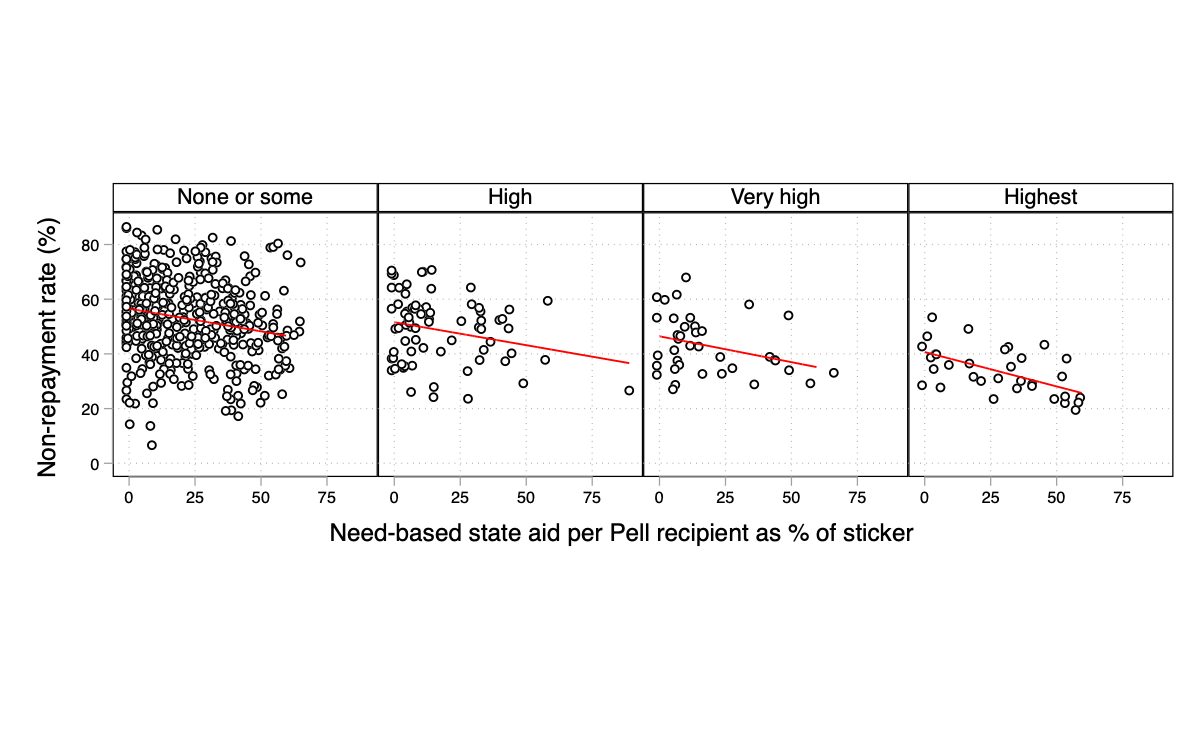




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F10A_default_
    > needbased.pdf saved as PDF format


Linear regression                               Number of obs     =        499
                                                F(5, 49)          =      18.70
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1524
                                                Root MSE          =     12.242

                                 (Std. err. adjusted for 50 clusters in state)
------------------------------------------------------------------------------
             |               Robust
     default | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      HGroup |
       High  |  -4.307435   2.074877    -2.08   0.043    -8.477057   -.1378135
  Very high  |  -8.730441   1

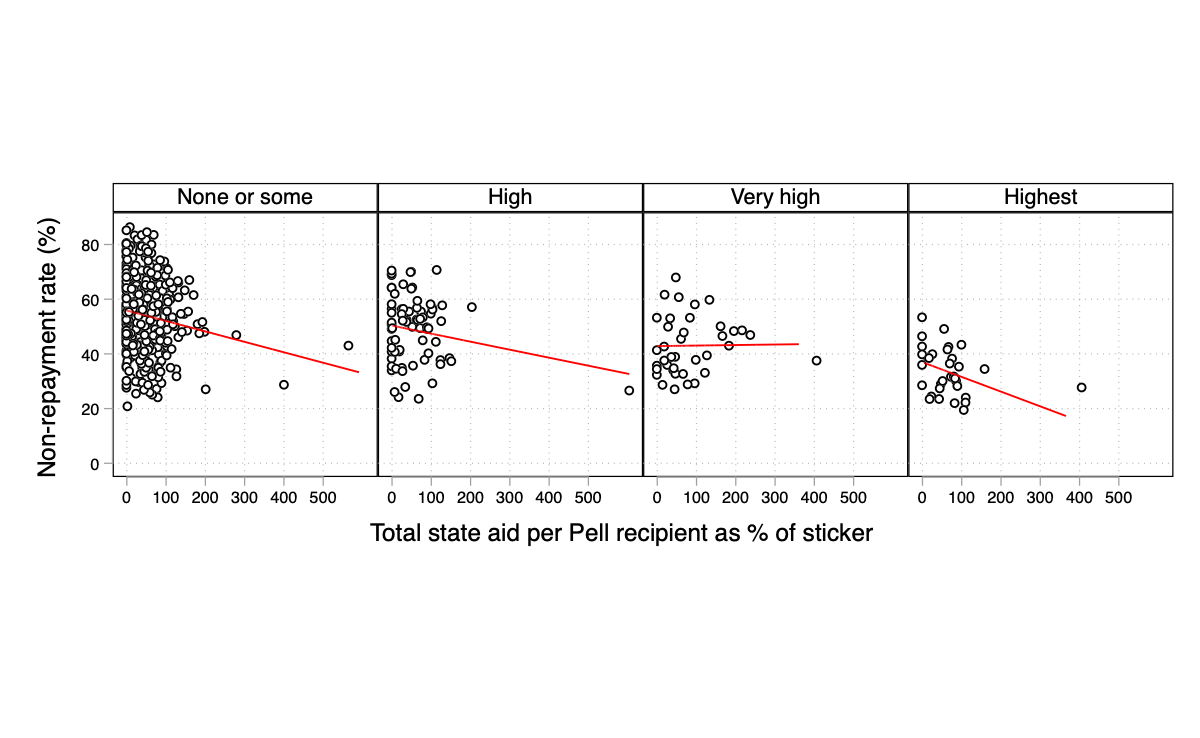




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F10B_default_
    > sgrnt.pdf saved as PDF format


Linear regression                               Number of obs     =        499
                                                F(5, 49)          =      13.32
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2057
                                                Root MSE          =     11.851

                                 (Std. err. adjusted for 50 clusters in state)
------------------------------------------------------------------------------
             |               Robust
     default | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      HGroup |
       High  |  -1.256677   1.771095    -0.71   0.481    -4.815826    2.302473
  Very high  |  -5.784792   1.454

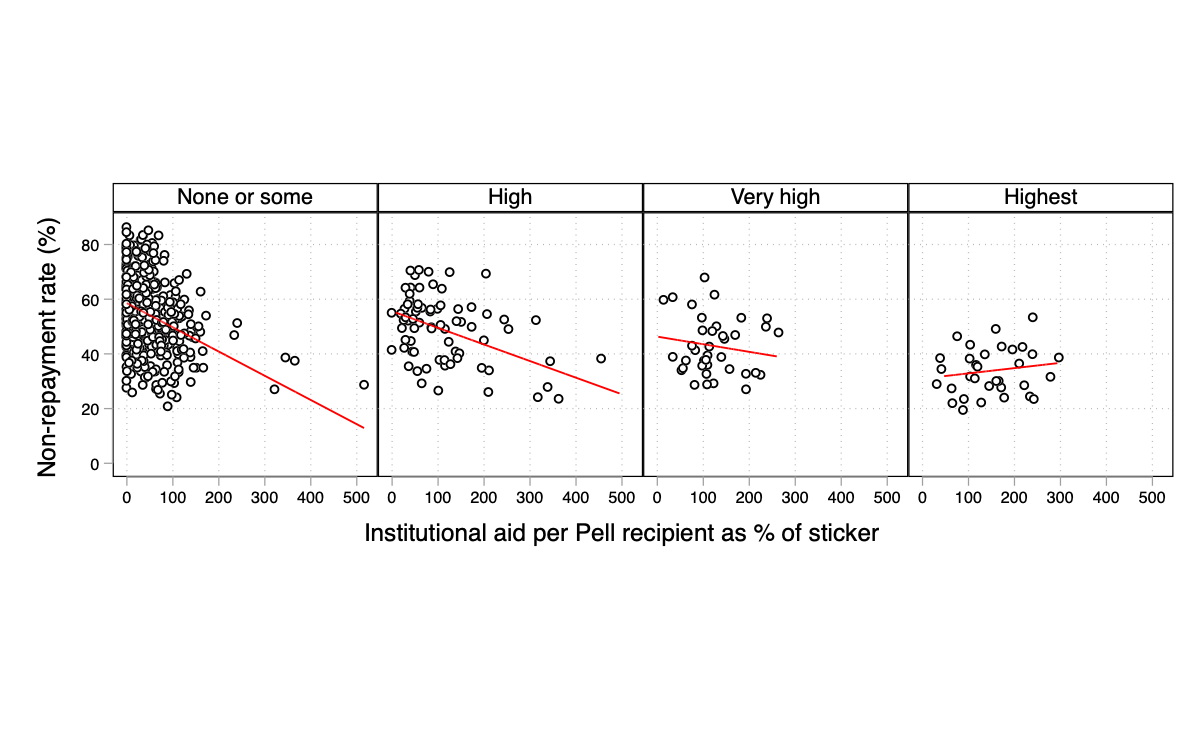




file
    /Users/Charlie/Dropbox/Stata_Notebooks/affordabilityecology/_F10C_defaul_i
    > grnt.pdf saved as PDF format


In [12]:
***  FIGURE 10 Repayment and Grant Aid
use affording_2000_2015_20220115, clear
keep if year>2009 & year<2014
replace lo_inc_rpy_3yr_rt_supp=. if year~=2013

keep if control==1
keep if highdeg==3 | highdeg==4

replace hgroup=7 if hgroup==9

replace hgroup=7 if hgroup==.

destring lo_inc_rpy_3yr_rt_supp, replace
sort opeid year
collapse (first) spend_ugdtuit_low spend_ugd_4yr_low instnm ///
hgroup stabbr lo_inc_debt_mdn lo_inc_rpy_3yr_rt_supp (sum) all_under ///
upgrntn igrnt_t fgrnt_t sgrnt_t fgrnt_n (mean) acceptrate enrolrate act25th ///
act75th sat25thread sat25thmath sat25th sat75thread sat75thmath sat75th ///
instatetuition low, by(opeid year)

gen igrnt_low_inc= igrnt_t / fgrnt_n
gen sgrnt_low_inc= sgrnt_t / fgrnt_n
gen fgrnt_low_inc= fgrnt_t / fgrnt_n
egen sandigrntt=rowtotal(igrnt_t sgrnt_t)
gen sandigrnt_low_inc=sandigrntt / fgrnt_n
replace acceptrate=. if year~=2010
collapse (firstnm) acceptrate lo_inc_rpy_3yr_rt_supp lo_inc_debt_mdn (first) instnm stabbr hgroup ///
(sum) upgrntn all_under (mean) spend_ugd_4yr_low spend_ugdtuit_low sgrnt_low_inc igrnt_low_inc sandigrnt_low_inc ///
instatetuition , by(opeid)

gen sgrnt_tuit=100 * (sgrnt_low_inc / instate)
gen igrnt_tuit=100 * (igrnt_low_inc / instate)
gen sandigrnt_tuit=100 * (sandigrnt_low_inc / instate)
gen default= 100*(1-lo_inc_rpy_3yr_rt_supp)
drop if default==.

	encode stabbr, gen(state)

reg default spend_ugdtuit_low, cluster(state)                          
reg default spend_ugdtuit_low i.hgroup, cluster(state)                //MH 29 Nov
reg default spend_ugdtuit_low i.hgroup hgroup#c.spend_ugdtuit_low, cluster(state)  //MH 29 Nov
testparm hgroup#c.spend_ugdtuit_low                                   //MH 29 Nov
drop if hgroup==.
gen HGroup=hgroup==7                //MH 29 Nov
replace HGroup=1 if hgroup==7
replace HGroup=2 if hgroup==5       //MH 29 Nov
replace HGroup=3 if hgroup==3       //MH 29 Nov
replace HGroup=4 if hgroup==1       //MH 29 Nov

lab def HGroup 1 "None or some" 2 "High" 3 "Very high" 4 "Highest"     //MH 29 Nov
lab val HGroup HGroup                                                  //MH 29 Nov
lab var HGroup "Type of university"                                    //MH 29 Nov

***FIGURE 10 A NEED BASED***
reg default HGroup##c.spend_ugdtuit_low acceptrate, cluster(opeid) ro //MH 29 Nov
reg default i.HGroup spend_ugdtuit_low acceptrate, cluster(state)                //MH 29 Nov

reg default HGroup##c.spend_ugdtuit_low, cluster(opeid) ro //MH 29 Nov
testparm HGroup##c.spend_ugdtuit_low  
predict pDefault if e(sample)                                         //MH 29 Nov

tw (scatter default spend_ugdtuit_low , msym(O) mfc(white) jitter(5))  ///
	(line pDefault spend_ugdtuit_low , sort lp(l) lc(red)), ///
		by(HGroup, compact row(1) legend(off) note("")) ///
		ytitle("Non-repayment rate (%)") ///
		xlab(0(25)75) xscale(range(-1 76)) ///
		xtitle("Need-based state aid per Pell recipient as % of sticker") ///
		ylab(0(20)80) ///
		xsize(6.5) aspect(1) name(default_needbased, replace)

graph export _F10A_default_needbased.pdf, replace

***  FIGURE 10 B TOTAL STATE GRANT AID 
reg default i.HGroup sgrnt_tuit acceptrate, cluster(state)                //MH 29 Nov
reg default i.HGroup##c.sgrnt_tuit acceptrate, cluster(state)                //MH 29 Nov
reg default i.HGroup##c.sgrnt_tuit, cluster(state) ro
testparm HGroup##c.sgrnt_tuit 
predict pDefault1 if e(sample)                                         //MH 29 Nov

tw (scatter default sgrnt_tuit , msym(O) mfc(white) jitter(5))  ///
	(line pDefault1 sgrnt_tuit , sort lp(l) lc(red)), ///
		by(HGroup, compact row(1) legend(off) note("")) ///
		ytitle("Non-repayment rate (%)") ///
		ylab(0(20)80) ///
		xlab(0(100)500) xscale(range(-1 131)) ///
		xtitle("Total state aid per Pell recipient as % of sticker") ///
		xsize(6.5) aspect(1) name(sgrnt_default, replace) 

graph export _F10B_default_sgrnt.pdf, replace

*****FIGURE 10 C ******Institutional GRANT AID ****
reg default i.HGroup igrnt_tuit acceptrate, cluster(state)                //MH 29 Nov
reg default i.HGroup##c.igrnt_tuit acceptrate, cluster(state) ro
reg default i.HGroup##c.igrnt_tuit, cluster(state) ro
testparm HGroup##c.igrnt_tuit  
predict pDefault2 if e(sample)                                         //MH 29 Nov

tw (scatter default igrnt_tuit if igrnt_tuit<., msym(O) mfc(white) jitter(5))  ///
	(line pDefault2 igrnt_tuit if igrnt_tuit<., sort lp(l) lc(red)), ///
		by(HGroup, compact row(1) legend(off) note("")) ///
		ytitle("Non-repayment rate (%)") ///
		ylab(0(20)80) ///
		xlab(0(100)500) xscale(range(-1 131)) ///
		xtitle("Institutional aid per Pell recipient as % of sticker") ///
		xsize(6.5) aspect(1)  name(igrnt_default, replace)
		
graph export _F10C_defaul_igrnt.pdf, replace